In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/pre-cog/keys/cases_court_key.csv
/kaggle/input/pre-cog/keys/judge_case_merge_key.csv


In [3]:
case_2010 = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2011.csv')
print(case_2010.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201908000022011  2011           1          1         1   
1  01-01-01-201908000032011  2011           1          1         1   
2  01-01-01-201908000042011  2011           1          1         1   
3  01-01-01-201908000052011  2011           1          1         1   
4  01-01-01-201908000062011  2011           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000252011  chief judicial magistrate           0 male   
1  MHNB030003242011  chief judicial magistrate           0 male   
2  MHNB030001492011  chief judicial magistrate           0 male   
3  MHNB030000282011  chief judicial magistrate           0 male   
4  MHNB030000332011  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0     -9998 unclear           -9999               0       1683        4762.0   
1          1 fem

In [4]:
case_2010['date_of_filing'].replace('', np.nan, inplace=True)
case_2010['date_of_decision'].replace('', np.nan, inplace=True)

In [5]:
case_2010["date_of_filing"] = pd.to_datetime(case_2010["date_of_filing"], errors = "coerce")
case_2010["date_of_decision"] = pd.to_datetime(case_2010["date_of_decision"], errors = "coerce")

In [6]:
case_2010.dropna(subset=['date_of_filing'], inplace=True)
case_2010.dropna(subset=['date_of_decision'], inplace=True)

In [7]:
case_2010.dtypes

ddl_case_id                  object
year                          int64
state_code                    int64
dist_code                     int64
court_no                      int64
cino                         object
judge_position               object
female_defendant             object
female_petitioner            object
female_adv_def                int64
female_adv_pet                int64
type_name                     int64
purpose_name                float64
disp_name                     int64
date_of_filing       datetime64[ns]
date_of_decision     datetime64[ns]
date_first_list              object
date_last_list               object
date_next_list               object
dtype: object

In [8]:
judge_case = pd.read_csv('/kaggle/input/pre-cog/keys/judge_case_merge_key.csv')

In [9]:
judge_case['ddl_filing_judge_id'].replace('', np.nan, inplace=True)
judge_case['ddl_decision_judge_id'].replace('', np.nan, inplace=True)

In [10]:
judge_case.dropna(subset=['ddl_filing_judge_id'], inplace=True)
judge_case.dropna(subset=['ddl_decision_judge_id'], inplace=True)

In [11]:
merge_2010 = case_2010.merge(judge_case, left_on="ddl_case_id", right_on="ddl_case_id", how="left")
print(merge_2010.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201908000022011  2011           1          1         1   
1  01-01-01-201908000032011  2011           1          1         1   
2  01-01-01-201908000042011  2011           1          1         1   
3  01-01-01-201908000052011  2011           1          1         1   
4  01-01-01-201908000062011  2011           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000252011  chief judicial magistrate           0 male   
1  MHNB030003242011  chief judicial magistrate           0 male   
2  MHNB030001492011  chief judicial magistrate           0 male   
3  MHNB030000282011  chief judicial magistrate           0 male   
4  MHNB030000332011  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  ...  type_name  purpose_name  disp_name  \
0     -9998 unclear           -9999  ...       1683        4762.0         25   
1          1 fem

In [12]:
merge_2010.dropna(subset=['ddl_filing_judge_id'], inplace=True)
merge_2010.dropna(subset=['ddl_decision_judge_id'], inplace=True)

In [13]:
print(merge_2010.head())

                  ddl_case_id  year  state_code  dist_code  court_no  \
98   01-01-01-201908001082011  2011           1          1         1   
106  01-01-01-201908001172011  2011           1          1         1   
112  01-01-01-201908001252011  2011           1          1         1   
118  01-01-01-201908001312011  2011           1          1         1   
121  01-01-01-201908001352011  2011           1          1         1   

                 cino             judge_position female_defendant  \
98   MHNB030009302011  chief judicial magistrate         1 female   
106  MHNB030014612011  chief judicial magistrate           0 male   
112  MHNB030013342011  chief judicial magistrate           0 male   
118  MHNB030013202011  chief judicial magistrate           0 male   
121  MHNB030013032011  chief judicial magistrate           0 male   

    female_petitioner  female_adv_def  ...  type_name  purpose_name  \
98             0 male           -9999  ...       1683        3737.0   
106       

In [14]:
merge_2010['date_of_filing'].isnull().any()
merge_2010['date_of_decision'].isnull().any()

False

In [15]:
merge_2010.reset_index(drop=True, inplace=True)

In [16]:
print(merge_2010.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201908001082011  2011           1          1         1   
1  01-01-01-201908001172011  2011           1          1         1   
2  01-01-01-201908001252011  2011           1          1         1   
3  01-01-01-201908001312011  2011           1          1         1   
4  01-01-01-201908001352011  2011           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030009302011  chief judicial magistrate         1 female   
1  MHNB030014612011  chief judicial magistrate           0 male   
2  MHNB030013342011  chief judicial magistrate           0 male   
3  MHNB030013202011  chief judicial magistrate           0 male   
4  MHNB030013032011  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  ...  type_name  purpose_name  disp_name  \
0            0 male           -9999  ...       1683        3737.0         25   
1            0 m

In [17]:
merge_2010['duration'] = merge_2010['date_of_decision'] - merge_2010['date_of_filing']

In [18]:
filed_2010 = merge_2010.groupby('ddl_decision_judge_id').apply(lambda x: x['date_of_filing'].count())
print(filed_2010)

ddl_decision_judge_id
50.0        7
51.0        5
52.0        2
92.0       43
93.0       26
           ..
98429.0     1
98447.0    10
98448.0     1
98457.0     1
98474.0     1
Length: 5324, dtype: int64


In [89]:
judge_w_1 = merge_2010.groupby('ddl_decision_judge_id').apply(lambda x: (x['date_of_decision'] - x['date_of_filing']).dt.days.le(365).sum())
print(judge_w_1)

ddl_decision_judge_id
50.0        5
51.0        0
52.0        0
92.0       20
93.0        0
           ..
98429.0     0
98447.0    10
98448.0     0
98457.0     1
98474.0     1
Length: 5324, dtype: int64


In [90]:
judge_w_5 = merge_2010.groupby('ddl_decision_judge_id').apply(lambda x: (x['date_of_decision'] - x['date_of_filing']).dt.days.le(365*5).sum())

In [91]:
print(judge_w_5)

ddl_decision_judge_id
50.0        7
51.0        5
52.0        2
92.0       43
93.0       26
           ..
98429.0     0
98447.0    10
98448.0     1
98457.0     1
98474.0     1
Length: 5324, dtype: int64


In [92]:
judge_w_1 = (judge_w_1 / filed_2010)*100
judge_w_5 = (judge_w_5 / filed_2010)*100

In [93]:
judge_w_1 = judge_w_1.sort_values(ascending=False)
judge_w_5 = judge_w_5.sort_values(ascending=False)

Mean:  18.369499393375847
Median:  0.0
Standard Deviation:  35.16138675289832


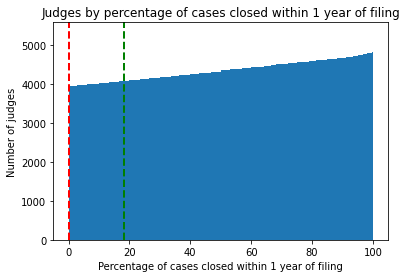

In [94]:
judge_w_1.plot(kind='hist', bins=10000, cumulative=True)
plt.pyplot.xlabel('Percentage of cases closed within 1 year of filing')
plt.pyplot.ylabel('Number of judges')
plt.pyplot.title('Judges by percentage of cases closed within 1 year of filing')

print('Mean: ', judge_w_1.mean())
print('Median: ', judge_w_1.median())
print('Standard Deviation: ', judge_w_1.std())
plt.pyplot.axvline(judge_w_1.mean(), color='g', linestyle='dashed', linewidth=2, label='Mean')
plt.pyplot.axvline(judge_w_1.median(), color='r', linestyle='dashed', linewidth=2, label='Median')

plt.pyplot.savefig('case_close_0_1.png')

Mean:  65.48504011724364
Median:  100.0
Standard Deviation:  45.797006540976135


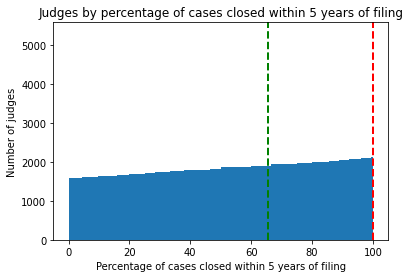

In [95]:
judge_w_5.plot(kind='hist', bins=10000, cumulative=True)
plt.pyplot.xlabel('Percentage of cases closed within 5 years of filing')
plt.pyplot.ylabel('Number of judges')
plt.pyplot.title('Judges by percentage of cases closed within 5 years of filing')

print('Mean: ', judge_w_5.mean())
print('Median: ', judge_w_5.median())
print('Standard Deviation: ', judge_w_5.std())
plt.pyplot.axvline(judge_w_5.mean(), color='g', linestyle='dashed', linewidth=2, label='Mean')
plt.pyplot.axvline(judge_w_5.median(), color='r', linestyle='dashed', linewidth=2, label='Median')

plt.pyplot.savefig('case_close_0_5.png')